In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
#import loompy
import matplotlib as mpl
import harmonypy as hm

In [2]:
input_file='/lustre/scratch126/cellgen/team205/rl20/CTCL/object_revision/CTCL_all_final.h5ad'
adata = sc.read_h5ad(input_file)

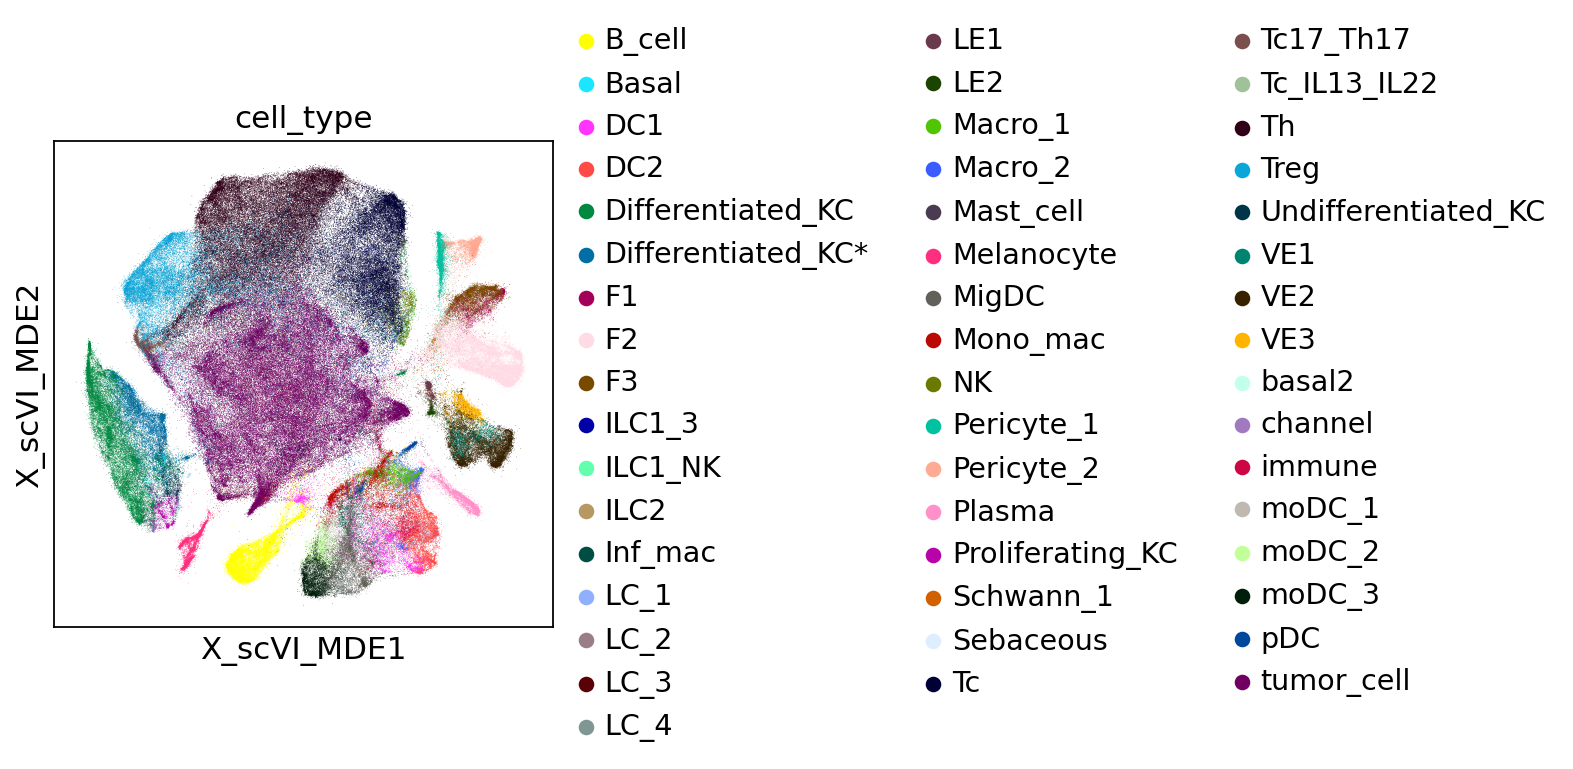

In [153]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pl.embedding(adata, color=['cell_type'], basis = 'X_scVI_MDE')

In [4]:
adata = adata[adata.obs['cell_type'].isin(['tumor_cell','NK','ILC1_3','ILC1_NK','ILC2',
                                               'Tc','Tc17_Th17', 'Tc_IL13_IL22','Th','Treg'])].copy()

In [2]:
#adata.obs

In [7]:
adata.X.expm1().sum(axis = 1)

/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/scipy/sparse/data.py:133: RuntimeWarning: overflow encountered in expm1
  result = op(self._deduped_data())


matrix([[1.7392795e+18],
        [          inf],
        [1.7392755e+18],
        ...,
        [5.3204877e+11],
        [3.7333041e+32],
        [          inf]], dtype=float32)

In [8]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

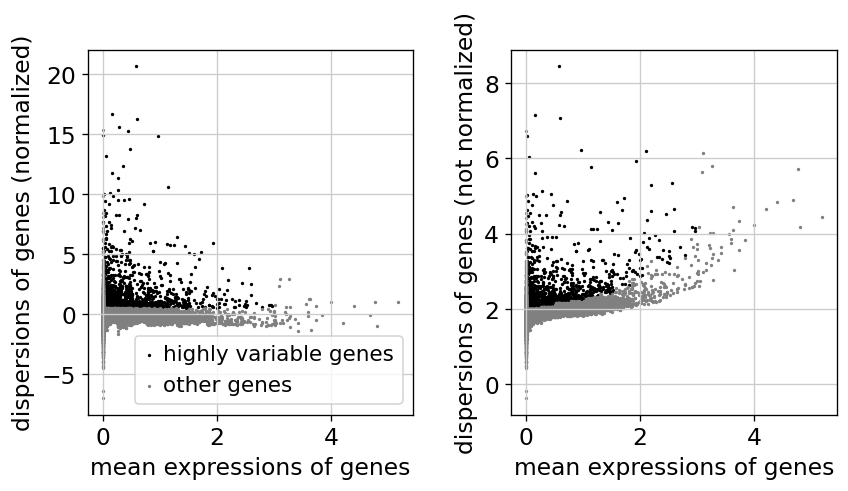

In [9]:
sc.settings.set_figure_params(dpi=60, facecolor='white')
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [13]:
adata_filtered = adata[:, adata.var['highly_variable']]

In [ ]:
sc.pp.scale(adata_filtered, max_value=10)
sc.tl.pca(adata_filtered, n_comps=50)
sc.pl.pca(adata_filtered, color = ['donor'])

In [15]:
sc.pp.neighbors(adata_filtered, n_neighbors=15, n_pcs=50, random_state = 1234)
sc.tl.umap(adata_filtered)

/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/numba/core/typed_passes.py:327: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../my-c

In [ ]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(adata_filtered, color=['donor'])

In [ ]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(adata_filtered, color=['type'])

In [13]:
adata_filtered.obs['cell_type'] = adata_filtered.obs['cell_type'].astype('str')
adata_filtered.obs.loc[adata_filtered.obs['type']=='tumor_cell', 'cell_type'] = 'tumor_cell'


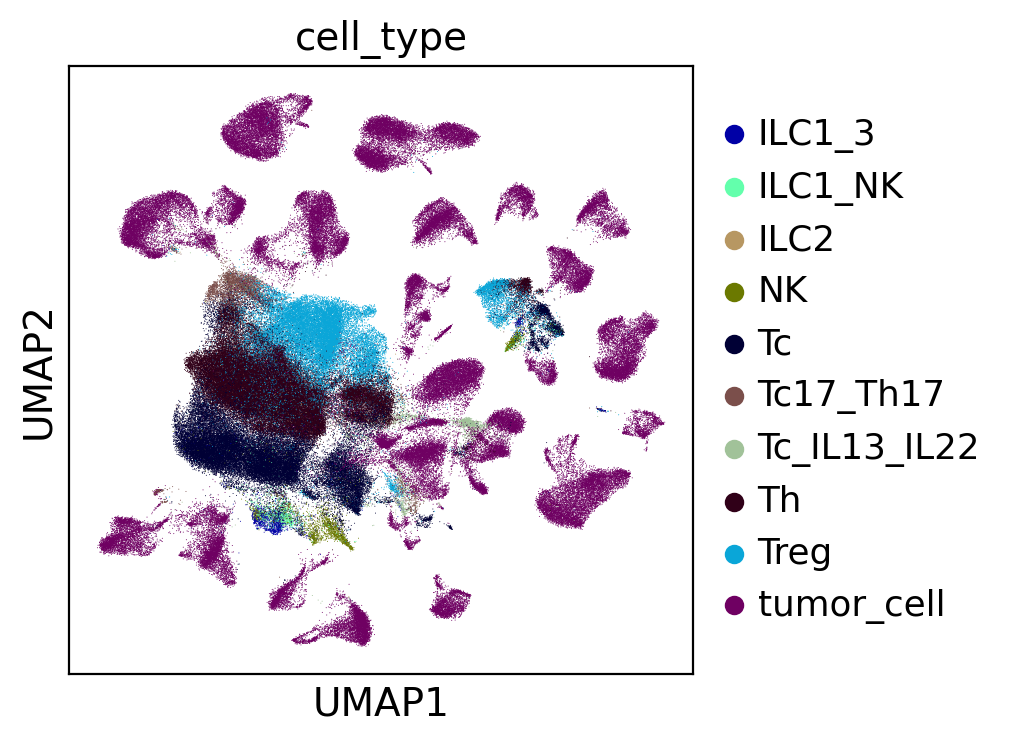

In [14]:
sc.pl.umap(adata_filtered, color=['cell_type'])

In [15]:
save_file = '/lustre/scratch126/cellgen/team205/rl20/CTCL/object_revision/CTCL_Tcell_processed_final.h5ad'
adata_filtered.write(save_file)

In [2]:
input_file='/lustre/scratch126/cellgen/team205/rl20/CTCL/object_revision/CTCL_Tcell_processed_final.h5ad'
adata_filtered = sc.read_h5ad(input_file)

In [ ]:
ll = pd.read_csv('/lustre/scratch126/cellgen/team205/rl20/CTCL/TCR_revision/tcr_meta_CTCL.csv')
#ll

In [4]:
ll = ll[~ll.index.duplicated()]

In [5]:
ll['IR_VJ_1_junction_aa'].value_counts()

CAGVTGNQFYF         7984
CAVTGNQFYF          7695
CAVRDLLTGGGNKLTF    7023
CAASDSWGKLQF        6529
CASPSGGGADGLTF      3364
                    ... 
CAGQKTSYDKVIF          1
CALISSGSARQLTF         1
CAGQEGGSEKLVF          1
CANPKAAGNKLTF          1
CAVTLLNQAGTALIF        1
Name: IR_VJ_1_junction_aa, Length: 31506, dtype: int64

In [6]:
ll.loc[pd.isna(ll['IR_VJ_1_junction_aa']), 'IR_VJ_1_junction_aa'] = 'None'
ll.loc[pd.isna(ll['IR_VJ_2_junction_aa']), 'IR_VJ_2_junction_aa'] = 'None'
ll.loc[pd.isna(ll['IR_VDJ_1_junction_aa']), 'IR_VDJ_1_junction_aa'] = 'None'
ll.loc[pd.isna(ll['IR_VDJ_2_junction_aa']), 'IR_VDJ_2_junction_aa'] = 'None'

/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [7]:
ll['TCR_pair'] = 'TRA:' + ll['IR_VJ_1_junction_aa'] + ':' + ll['IR_VJ_2_junction_aa'] + '_TRB:' + ll['IR_VDJ_1_junction_aa'] + ':' + ll['IR_VDJ_2_junction_aa']

/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
ll['TCR_pair'].value_counts()

TRA:CAVTGNQFYF:None_TRB:CSARTGGYGYTF:None                   7303
TRA:CAVRDLLTGGGNKLTF:None_TRB:CSARTGSNQPQHF:None            6887
TRA:CAASDSWGKLQF:None_TRB:CASSPSTQSNEKLFF:None              6289
TRA:CAGVTGNQFYF:CIVRGVYSGAGSYQLTF_TRB:CAWSAGRDYGYTF:None    5569
TRA:CAAYMNSGYSTLTF:None_TRB:CASSQAFGPPHGTIYF:None           2962
                                                            ... 
TRA:CATDANDYKLSF:None_TRB:CASSNGEYNEQFF:None                   1
TRA:None:None_TRB:CASSLIPGSYEQYF:None                          1
TRA:CAGESRNAGGTSYGKLTF:None_TRB:CASSLGVLRSNTGELFF:None         1
TRA:None:None_TRB:CASSWGTGFYEQYF:None                          1
TRA:CGTSYSGNTPLVF:None_TRB:CASSLAGGTPYEQYF:None                1
Name: TCR_pair, Length: 54395, dtype: int64

In [114]:
adata_filtered.obs['TCR_pair'] = ll['TCR_pair'].copy()

In [115]:
adata_filtered[adata_filtered.obs['TCR_pair']=='TRA:CAVTGNQFYF:None_TRB:CSARTGGYGYTF:None'].obs

,Sanger_ID,tissue,site,Sex,batch,n_counts,n_genes,percent_mito,study,donor,tech,cell_type,barcode,type,IR_VJ_1_junction_aa,TCR_pair,TCR_pair_plot,dot_size
ACGGAGACAAATCCGT-32_CTCL3_CTCL3_CTCL3,CTCL3_GEX_1,Dermis,lesion,Female,32,2723.0,1165,0.000000,8_CTCL,CTCL3,10x,tumor_cell,ACGGAGACAAATCCGT-32,tumor_cell,CAVTGNQFYF,TRA:CAVTGNQFYF:None_TRB:CSARTGGYGYTF:None,None,1
AGAGCTTGTTCGGCAC-32_CTCL3_CTCL3_CTCL3,CTCL3_GEX_1,Dermis,lesion,Female,32,3746.0,2146,0.002331,8_CTCL,CTCL3,10x,tumor_cell,AGAGCTTGTTCGGCAC-32,tumor_cell,CAVTGNQFYF,TRA:CAVTGNQFYF:None_TRB:CSARTGGYGYTF:None,None,1
AGATCTGCAACTGCGC-32_CTCL3_CTCL3_CTCL3,CTCL3_GEX_1,Dermis,lesion,Female,32,4329.0,2399,0.025428,8_CTCL,CTCL3,10x,tumor_cell,AGATCTGCAACTGCGC-32,tumor_cell,CAVTGNQFYF,TRA:CAVTGNQFYF:None_TRB:CSARTGGYGYTF:None,None,1
ATGCGATTCTCGGACG-32_CTCL3_CTCL3_CTCL3,CTCL3_GEX_1,Dermis,lesion,Female,32,3687.0,1879,0.021228,8_CTCL,CTCL3,10x,tumor_cell,ATGCGATTCTCGGACG-32,tumor_cell,CAVTGNQFYF,TRA:CAVTGNQFYF:None_TRB:CSARTGGYGYTF:None,None,1
ATTATCCTCCAAATGC-32_CTCL3_CTCL3_CTCL3,CTCL3_GEX_1,Dermis,lesion,Female,32,6941.0,2970,0.022774,8_CTCL,CTCL3,10x,tumor_cell,ATTATCCTCCAAATGC-32,tumor_cell,CAVTGNQFYF,TRA:CAVTGNQFYF:None_TRB:CSARTGGYGYTF:None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTACGCACC-35_CTCL3_CTCL3_CTCL3,CTCL3_GEX_4,Epidermis,lesion,Female,35,3504.0,1936,0.000619,8_CTCL,CTCL3,10x,tumor_cell,TTTGGTTGTACGCACC-35,tumor_cell,CAVTGNQFYF,TRA:CAVTGNQFYF:None_TRB:CSARTGGYGYTF:None,None,1
TTTGGTTGTGGCGAAT-35_CTCL3_CTCL3_CTCL3,CTCL3_GEX_4,Epidermis,lesion,Female,35,4353.0,2413,0.007209,8_CTCL,CTCL3,10x,tumor_cell,TTTGGTTGTGGCGAAT-35,tumor_cell,CAVTGNQFYF,TRA:CAVTGNQFYF:None_TRB:CSARTGGYGYTF:None,None,1
TTTGTCAGTCTAGTCA-35_CTCL3_CTCL3_CTCL3,CTCL3_GEX_4,Epidermis,lesion,Female,35,2676.0,1678,0.001375,8_CTCL,CTCL3,10x,tumor_cell,TTTGTCAGTCTAGTCA-35,tumor_cell,CAVTGNQFYF,TRA:CAVTGNQFYF:None_TRB:CSARTGGYGYTF:None,None,1
TTTGTCAGTCTCTCTG-35_CTCL3_CTCL3_CTCL3,CTCL3_GEX_4,Epidermis,lesion,Female,35,3228.0,1881,0.002910,8_CTCL,CTCL3,10x,tumor_cell,TTTGTCAGTCTCTCTG-35,tumor_cell,CAVTGNQFYF,TRA:CAVTGNQFYF:None_TRB:CSARTGGYGYTF:None,None,1


In [116]:
adata_filtered.obs['TCR_pair'].value_counts().to_csv('./TCR_pair_list_merged_cell.csv')

In [3]:
#adata_filtered.obs

In [251]:
adata_filtered.obs['TCR_pair_plot'] = None
            
adata_filtered.obs.loc[adata_filtered.obs['TCR_pair'] == 'TRA:CATDARKGTSGSRLTF:None_TRB:CATSRDRGRGKETQYF:None', 'TCR_pair_plot'] = 'TRA:CATDARKGTSGSRLTF:None_TRB:CATSRDRGRGKETQYF:None'
adata_filtered.obs.loc[adata_filtered.obs['TCR_pair'].isin(['TRA:CAYRSGNSGYALNF:None_TRB:CASSFTTYHTDTQYF:None', 'TRA:CAYRSGNSGYALNF:CAVNKVDQGITGANSKLTF_TRB:CASSFTTYHTDTQYF:None']), 'TCR_pair_plot'] = 'TRA:CAYRSGNSGYALNF:None_TRB:CASSFTTYHTDTQYF:None'
adata_filtered.obs.loc[adata_filtered.obs['TCR_pair'] == 'TRA:CIAYRIQGAQKLVF:None_TRB:CASSLQGSDTQYF:None', 'TCR_pair_plot'] = 'TRA:CIAYRIQGAQKLVF:None_TRB:CASSLQGSDTQYF:None'
adata_filtered.obs.loc[adata_filtered.obs['TCR_pair'] == 'TRA:CALTFTGGGNKLTF:None_TRB:CASSYSPGGNYGYTF:None', 'TCR_pair_plot'] = 'TRA:CALTFTGGGNKLTF:None_TRB:CASSYSPGGNYGYTF:None'
adata_filtered.obs.loc[adata_filtered.obs['TCR_pair'] == 'TRA:CRGGGFKTIF:None_TRB:CASSYSFSDETQYF:None', 'TCR_pair_plot'] = 'TRA:CRGGGFKTIF:None_TRB:CASSYSFSDETQYF:None'
adata_filtered.obs.loc[adata_filtered.obs['TCR_pair'] == 'TRA:CAANPSSGTYKYIF:None_TRB:CASSDFYEQYF:None', 'TCR_pair_plot'] = 'TRA:CAANPSSGTYKYIF:None_TRB:CASSDFYEQYF:None'

In [252]:
adata_filtered.obs['TCR_pair_plot'].value_counts()

TRA:CATDARKGTSGSRLTF:None_TRB:CATSRDRGRGKETQYF:None    201
TRA:CAYRSGNSGYALNF:None_TRB:CASSFTTYHTDTQYF:None       169
TRA:CIAYRIQGAQKLVF:None_TRB:CASSLQGSDTQYF:None          96
TRA:CALTFTGGGNKLTF:None_TRB:CASSYSPGGNYGYTF:None        66
TRA:CRGGGFKTIF:None_TRB:CASSYSFSDETQYF:None             61
TRA:CAANPSSGTYKYIF:None_TRB:CASSDFYEQYF:None            58
Name: TCR_pair_plot, dtype: int64

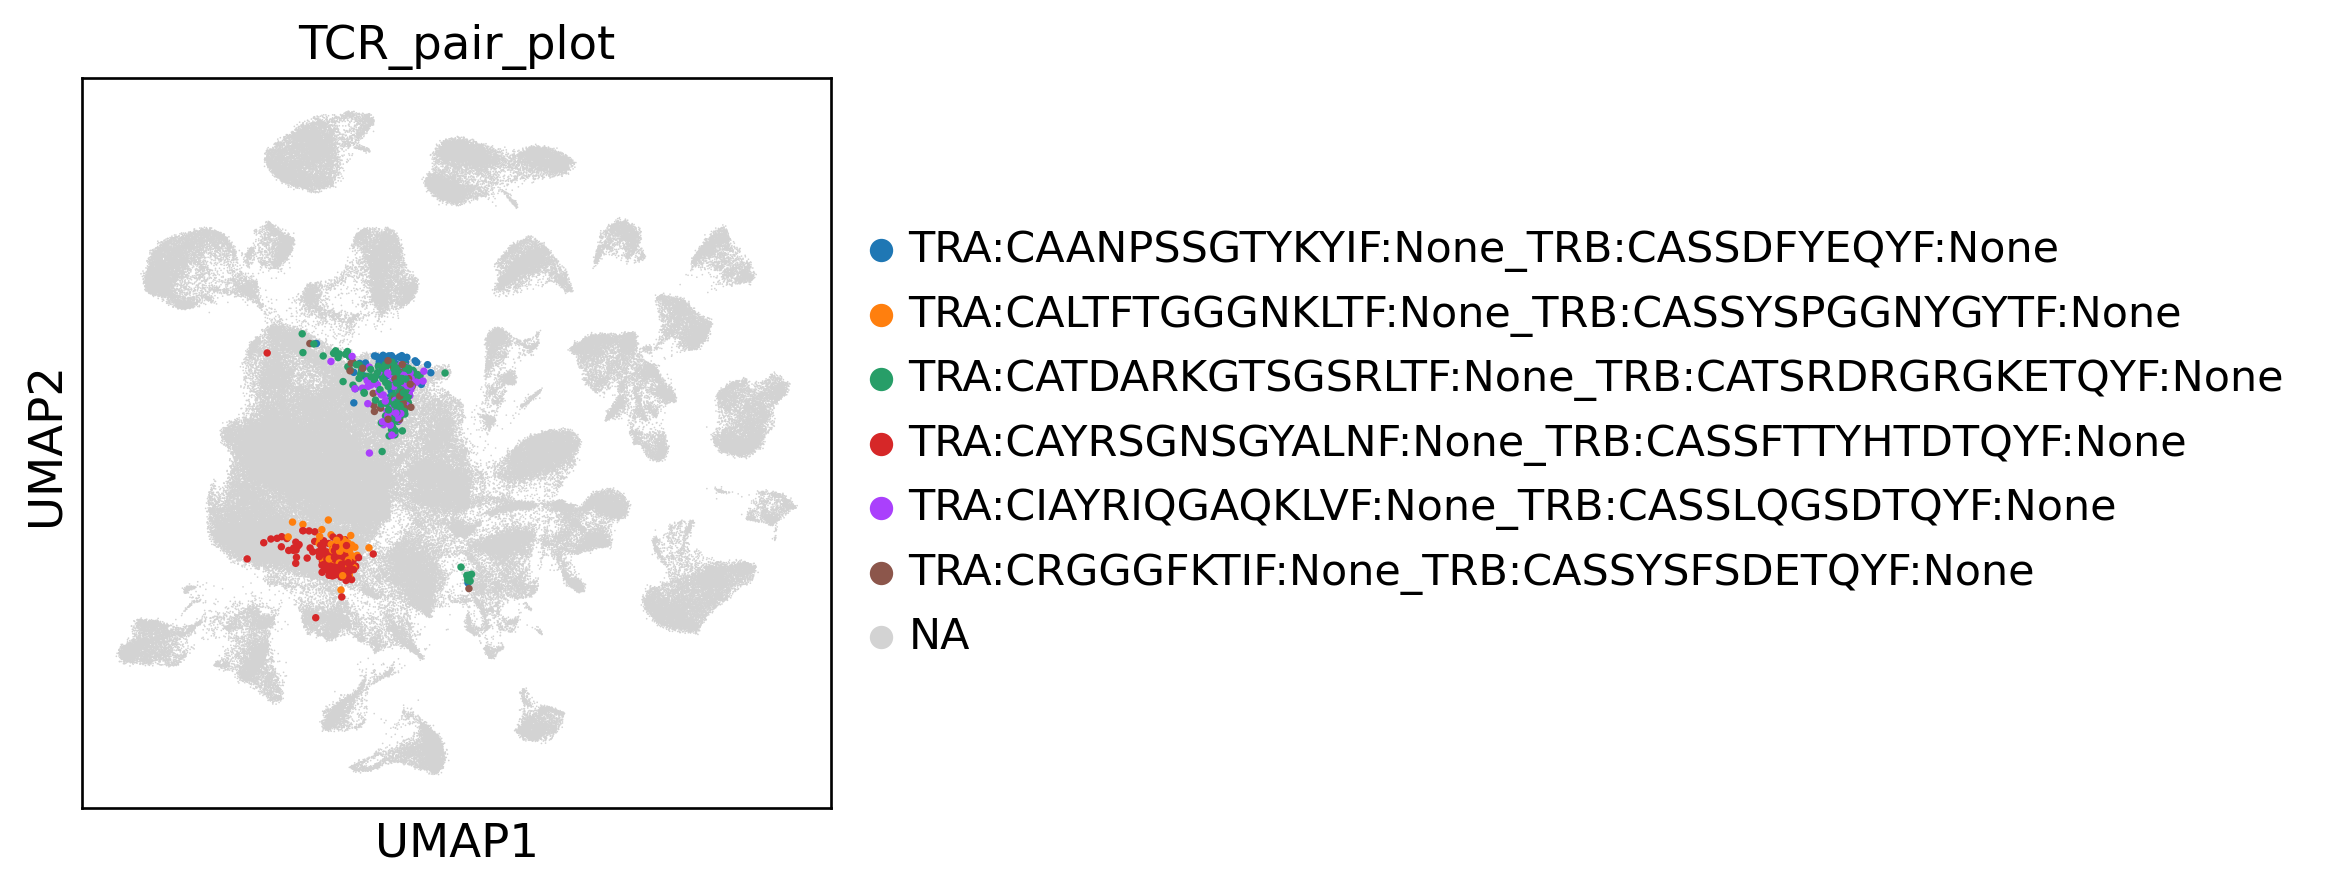

In [255]:
adata_filtered.obs['dot_size'] = 1
adata_filtered.obs.loc[~pd.isna(adata_filtered.obs['TCR_pair_plot']), 'dot_size'] = 20

sc.settings.set_figure_params(dpi=120, facecolor='white')
sc.pl.umap(adata_filtered, color=['TCR_pair_plot'], size= adata_filtered.obs['dot_size'])

In [256]:
ll['clone'] = 'None'

ll.loc[ll['TCR_pair']=='TRA:CAVRDLLTGGGNKLTF:None_TRB:CSARTGSNQPQHF:None', 'clone'] = 'clone_CTCL1_pair'
ll.loc[ll['TCR_pair']=='TRA:CAVRDLLTGGGNKLTF:None_TRB:None:None', 'clone'] = 'clone_CTCL1_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CSARTGSNQPQHF:None', 'clone'] = 'clone_CTCL1_TRB_sc'

ll.loc[ll['TCR_pair']=='TRA:CAAGLRTRNAGNMLTF:None_TRB:CASRASSNSGRASYEQYF:None', 'clone'] = 'clone_CTCL2_pair'
ll.loc[ll['TCR_pair']=='TRA:CAAGLRTRNAGNMLTF:None_TRB:None:None', 'clone'] = 'clone_CTCL2_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CASRASSNSGRASYEQYF:None', 'clone'] = 'clone_CTCL2_TRB_sc'

ll.loc[ll['TCR_pair']=='TRA:CAVTGNQFYF:None_TRB:CSARTGGYGYTF:None', 'clone'] = 'clone_CTCL3_pair'
ll.loc[ll['TCR_pair']=='TRA:CAVTGNQFYF:None_TRB:None:None', 'clone'] = 'clone_CTCL3_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CSARTGGYGYTF:None', 'clone'] = 'clone_CTCL3_TRB_sc'

ll.loc[ll['TCR_pair']=='TRA:CAMVKGGSQGNLIF:None_TRB:CASSVSGSNTEAFF:None', 'clone'] = 'clone_CTCL4_pair'
ll.loc[ll['TCR_pair']=='TRA:CAMVKGGSQGNLIF:None_TRB:None:None', 'clone'] = 'clone_CTCL4_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CASSVSGSNTEAFF:None', 'clone'] = 'clone_CTCL4_TRB_sc'

ll.loc[ll['TCR_pair']=='TRA:CAASDSWGKLQF:None_TRB:CASSPSTQSNEKLFF:None', 'clone'] = 'clone_CTCL5_pair'
ll.loc[ll['TCR_pair']=='TRA:CAASDSWGKLQF:None_TRB:None:None', 'clone'] = 'clone_CTCL5_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CASSPSTQSNEKLFF:None', 'clone'] = 'clone_CTCL5_TRB_sc'

ll.loc[ll['TCR_pair']=='TRA:CAAYMNSGYSTLTF:None_TRB:CASSQAFGPPHGTIYF:None', 'clone'] = 'clone_CTCL6_pair'
ll.loc[ll['TCR_pair']=='TRA:CAAYMNSGYSTLTF:None_TRB:None:None', 'clone'] = 'clone_CTCL6_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CASSQAFGPPHGTIYF:None', 'clone'] = 'clone_CTCL6_TRB_sc'

ll.loc[ll['TCR_pair'].isin(['TRA:CAVGVTSGTYKYIF:CALSGTHQAGTALIF_TRB:CASSYRGPYNEQFF:None',
                            'TRA:CALSGTHQAGTALIF:CAVGVTSGTYKYIF_TRB:CASSYRGPYNEQFF:None',
                            'TRA:CALSGTHQAGTALIF:None_TRB:CASSYRGPYNEQFF:None',
                            'TRA:CAVGVTSGTYKYIF:None_TRB:CASSYRGPYNEQFF:None']), 'clone'] = 'clone_CTCL7_pair' 
ll.loc[ll['TCR_pair'].isin(['TRA:CAVGVTSGTYKYIF:None_TRB:None:None',
                            'TRA:CALSGTHQAGTALIF:None_TRB:None:None']), 'clone'] = 'clone_CTCL7_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CASSYRGPYNEQFF:None', 'clone'] = 'clone_CTCL7_TRB_sc'

ll.loc[ll['TCR_pair'].isin(['TRA:CAEGLDSGGGADGLTF:CAVRGNYGQNFVF_TRB:CASSLVMGVANTEAFF:None',
                            'TRA:CAEGLDSGGGADGLTF:None_TRB:CASSLVMGVANTEAFF:None',
                            'TRA:CAVRGNYGQNFVF:None_TRB:CASSLVMGVANTEAFF:None']), 'clone'] = 'clone_CTCL8_pair' 
ll.loc[ll['TCR_pair'].isin(['TRA:CAVRGNYGQNFVF:None_TRB:None:None',
                            'TRA:CAEGLDSGGGADGLTF:None_TRB:None:None']), 'clone'] = 'clone_CTCL8_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CASSLVMGVANTEAFF:None', 'clone'] = 'clone_CTCL8_TRB_sc'

ll.loc[ll['TCR_pair'].isin(['TRA:CASPSGGGADGLTF:CAYRGTSYGKLTF_TRB:CASSQVLRTGGTDTQYF:None',
                            'TRA:CASPSGGGADGLTF:None_TRB:CASSQVLRTGGTDTQYF:None',
                            'TRA:CAYRGTSYGKLTF:None_TRB:CASSQVLRTGGTDTQYF:None']), 'clone'] = 'clone_MF17_pair'  
ll.loc[ll['TCR_pair'].isin(['TRA:CASPSGGGADGLTF:None_TRB:None:None',
                            'TRA:CAYRGTSYGKLTF:None_TRB:None:None']), 'clone'] = 'clone_MF17_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CASSQVLRTGGTDTQYF:None', 'clone'] = 'clone_MF17_TRB_sc'

ll.loc[ll['TCR_pair']=='TRA:CALSTAMDSNYQLIW:None_TRB:CSARAPGQSSYNSPLHF:None', 'clone'] = 'clone_MF21_pair' 
ll.loc[ll['TCR_pair']=='TRA:CALSTAMDSNYQLIW:None_TRB:None:None', 'clone'] = 'clone_MF21_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CSARAPGQSSYNSPLHF:None', 'clone'] = 'clone_MF21_TRB_sc'

ll.loc[ll['TCR_pair']=='TRA:CAVTNDYKLSF:None_TRB:CASSSGELFF:None', 'clone'] = 'clone_MF22_pair' 
ll.loc[ll['TCR_pair']=='TRA:CAVTNDYKLSF:None_TRB:None:None', 'clone'] = 'clone_MF22_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CASSSGELFF:None', 'clone'] = 'clone_MF22_TRB_sc'

ll.loc[ll['TCR_pair'].isin(['TRA:CAMREGFRDDKIIF:CAASIRPDQTGANNLFF_TRB:CASSEIGQGNEKLFF:None',
                            'TRA:CAMREGFRDDKIIF:None_TRB:CASSEIGQGNEKLFF:None',
                            'TRA:CAASIRPDQTGANNLFF:None_TRB:CASSEIGQGNEKLFF:None']), 'clone'] = 'clone_MF26_pair'  
ll.loc[ll['TCR_pair'].isin(['TRA:CAMREGFRDDKIIF:None_TRB:None:None',
                            'TRA:CAASIRPDQTGANNLFF:None_TRB:None:None']), 'clone'] = 'clone_MF26_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CASSEIGQGNEKLFF:None', 'clone'] = 'clone_MF26_TRB_sc'

ll.loc[ll['TCR_pair'].isin(['TRA:CIVRGVYSGAGSYQLTF:CAGVTGNQFYF_TRB:CAWSAGRDYGYTF:None',
                            'TRA:CIVRGVYSGAGSYQLTF:None_TRB:CAWSAGRDYGYTF:None',
                            'TRA:CAGVTGNQFYF:None_TRB:CAWSAGRDYGYTF:None']), 'clone'] = 'clone_MF28_pair'  
ll.loc[ll['TCR_pair'].isin(['TRA:CIVRGVYSGAGSYQLTF:None_TRB:None:None',
                            'TRA:CAGVTGNQFYF:None_TRB:None:None']), 'clone'] = 'clone_MF28_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CAWSAGRDYGYTF:None', 'clone'] = 'clone_MF28_TRB_sc'

ll.loc[ll['TCR_pair']=='TRA:CAGWDSGAGSYQLTF:None_TRB:CASSEWGGLAGNTIYF:None', 'clone'] = 'clone_MF30_pair' 
ll.loc[ll['TCR_pair']=='TRA:CAGWDSGAGSYQLTF:None_TRB:None:None', 'clone'] = 'clone_MF30_TRA_sc'
ll.loc[ll['TCR_pair']=='TRA:None:None_TRB:CASSEWGGLAGNTIYF:None', 'clone'] = 'clone_MF30_TRB_sc'


/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [257]:
adata_filtered.obs['TCR_pair'] = ll['TCR_pair']
adata_filtered.obs['clone'] = ll['clone']

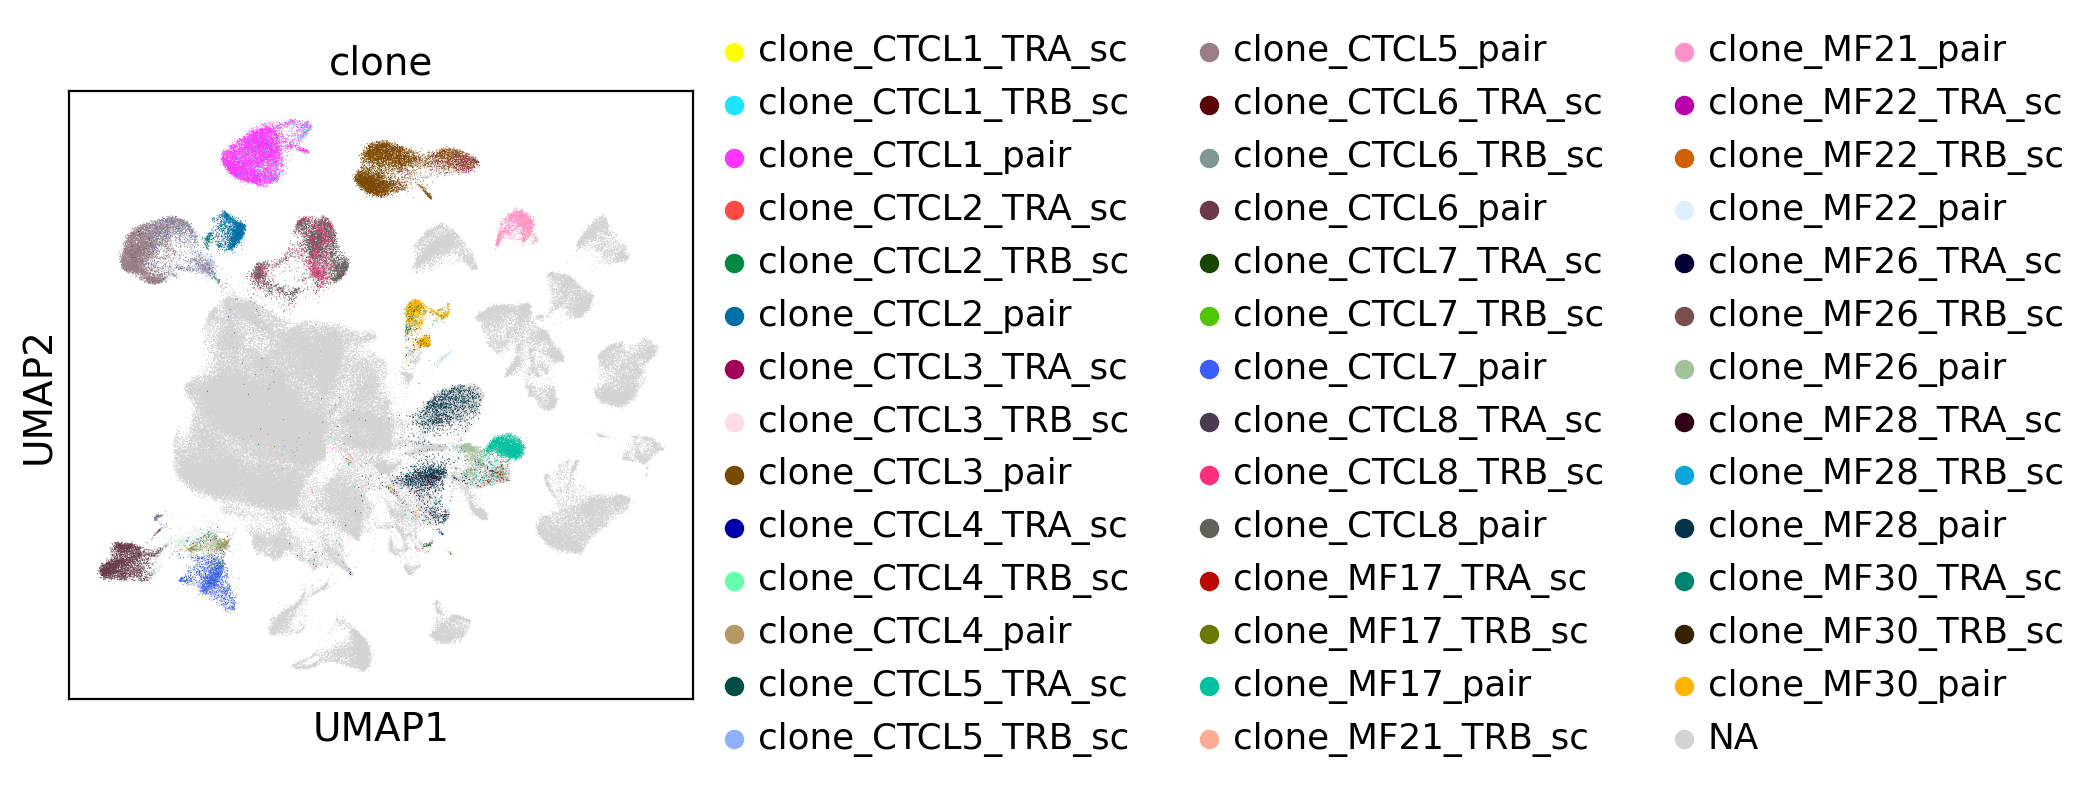

In [19]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(adata_filtered, color=['clone'])

In [4]:
#sc.pl.umap(adata_filtered, color=['type'],palette = 'tab20')